In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

#Initialize the model
from langchain_groq import ChatGroq
model = ChatGroq(model_name="deepseek-r1-distill-llama-70b")

d:\agenticBatch\venv\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
model.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.071281337, 'prompt_time': 0.009330484, 'queue_time': 0.044495466, 'total_time': 0.080611821}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--97f6b477-00b6-40b0-a82c-b3c0b56c2a4e-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [4]:
model.invoke("hi").content

'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

In [5]:
#Required imports
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage,AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [6]:
def call_model(state:MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages":[response]}

In [7]:
state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.182947109, 'prompt_time': 0.009789338, 'queue_time': 0.048785302, 'total_time': 0.192736447}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--16649c4f-9f17-4bf2-a0c9-6f3f229f2222-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [8]:
from langchain_core.messages import AnyMessage, BaseMessage
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated, Sequence

class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

class AgentMessage(TypedDict):
    message:Annotated[Sequence[BaseMessage],add_messages]

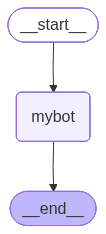

In [9]:
#Design a workflow without tool calling

workflow = StateGraph(MessagesState)
workflow.add_node("mybot",call_model)
workflow.add_edge(START,"mybot")
workflow.add_edge("mybot",END)
app = workflow.compile()
app


In [10]:
input={"messages":["hi hello how are you?"]}
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='fa5514bd-0c8d-4b94-ab08-f8342cf77e0c'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.210821036, 'prompt_time': 0.009782438, 'queue_time': 0.044344602, 'total_time': 0.220603474}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b0896148-07e4-4d9b-8257-720db4225066-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [11]:
#To check output from different nodes

for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 9, 'total_tokens': 47, 'completion_time': 0.181988241, 'prompt_time': 0.009844557, 'queue_time': 0.049373243, 'total_time': 0.191832798}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f8c7a18a-1b01-4a16-89a4-4f54cb0528b5-0', usage_metadata={'input_tokens': 9, 'output_tokens': 38, 'total_tokens': 47})]}




In [12]:
#This is a workflow with tool calling

@tool
def search(query:str):
    """This is a custom tool for checking weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    else:
        return "the temp is 25 degree and cloudy"

In [13]:
#Testing the tool
search.invoke("What is the weather in delhi?")

'the temp is 45 degree and sunny'

In [16]:
search.invoke("What is the weather in Bengaluru?")

'the temp is 25 degree and cloudy'

In [17]:
search

StructuredTool(name='search', description='This is a custom tool for checking weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001FB76EBBC40>)

In [18]:
model.invoke("What is the weather in Bengaluru?")

AIMessage(content="<think>\n\n</think>\n\nHi there! I suggest getting online to get real-time information. If you have any other questions, please don't hesitate to let me know!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 11, 'total_tokens': 45, 'completion_time': 0.186549902, 'prompt_time': 0.01021401, 'queue_time': 0.05159646, 'total_time': 0.196763912}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d9916476-19af-42d7-8700-8c5d1cd80dcc-0', usage_metadata={'input_tokens': 11, 'output_tokens': 34, 'total_tokens': 45})

In [14]:
#Binding a tool to the LLM
tools = [search]
llm_with_tools = model.bind_tools(tools)

In [15]:
#Testing llm with tools
response=llm_with_tools.invoke("what is a weather is delhi?")
response

AIMessage(content='', additional_kwargs={'reasoning_content': "Okay, the user is asking about the weather in Delhi. They might be planning a trip or just curious. I should use the 'search' tool to find the latest weather information. I'll format the tool call correctly to get the details they need.\n", 'tool_calls': [{'id': 'thvrcc82w', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 132, 'total_tokens': 208, 'completion_time': 0.370255817, 'prompt_time': 0.032843488, 'queue_time': 0.043855592, 'total_time': 0.403099305}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--27e931fc-4e91-4a0a-ad0d-d0eb36d18354-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'thvrcc82w', 'type': 'tool_call'}], usage_metadata={

In [16]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'thvrcc82w',
  'type': 'tool_call'}]

In [17]:
def call_model1(state:MessagesState):
    question=state["messages"]
    response=llm_with_tools.invoke(question)
    return {"messages":[response]}

In [18]:
#Router function
def router_function(state:MessagesState):
    last_message = state["messages"][-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [19]:
#Creating tool node
tool_node = ToolNode(tools)


In [20]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'store': ('store', None)}, tools_by_name={'search': StructuredTool(name='search', description='This is a custom tool for checking weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000013B3DFF5260>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

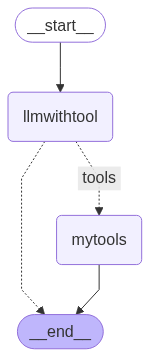

In [21]:
#Creating workflow with llm binded tools
workflow2 = StateGraph(MessagesState)
workflow2.add_node("llmwithtool",call_model1)
workflow2.add_node("mytools",tool_node)
workflow2.add_edge(START,"llmwithtool")
workflow2.add_conditional_edges("llmwithtool",router_function,{"tools":"mytools",END:END})
app2 = workflow2.compile()
app2


In [22]:
response = app2.invoke({"messages":["How is the weather in delhi?"]})
response["messages"][-1].content

'the temp is 45 degree and sunny'

In [23]:
response = app2.invoke({"messages":["How is the weather in Bengaluru?"]})
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [24]:
response = app2.invoke({"messages":["How is the weather in Bengaluru?"]})
response

{'messages': [HumanMessage(content='How is the weather in Bengaluru?', additional_kwargs={}, response_metadata={}, id='c14e6a6d-8b93-4111-9d47-b761c6740a6b'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in Bengaluru. They mentioned a tool called "search" which is used for checking the weather. I need to call this function with the query "weather in Bengaluru". \n\nFirst, I should make sure that the function name is correctly identified as "search". Then, the arguments should be a JSON object with the query parameter set to "weather in Bengaluru". \n\nSo, the tool call should look like this: {"name": "search", "arguments": {"query": "weather in Bengaluru"}}. This should be wrapped in <tool_call> tags as specified.\n\nI think that\'s all I need to do. Let me put it all together.\n', 'tool_calls': [{'id': 'yk7kw6r8s', 'function': {'arguments': '{"query":"weather in Bengaluru"}', 'name': 'search'}, 'type': 'function'}]}, respo

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


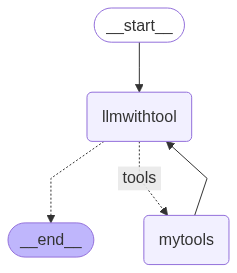

In [25]:
workflow2.add_edge("mytools","llmwithtool")
app3=workflow2.compile()
app3

In [26]:
for output in app3.stream({"messages":["What is the weather in Delhi"]}):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from llmwithtool Node
_______
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in Delhi. I need to use the search tool to find this information. Let me structure the function call correctly. The tool name is "search" and the argument is the query string. So, I should format it as a JSON object inside the tool_call tag. I\'ll set the name to "search" and the arguments to {"query": "weather in Delhi"}. That should do it.\n', 'tool_calls': [{'id': '6wzyegrpt', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 130, 'total_tokens': 245, 'completion_time': 0.495802164, 'prompt_time': 0.021058252, 'queue_time': 0.045993658, 'total_time': 0.516860416}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'service_tier': 'on_demand', 'finish_reason': 'tool_cal

In [27]:
for output in app3.stream({"messages":["What is the weather in Delhi.Can you tell me good hotels to stay in North Delhi?"]}):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from llmwithtool Node
_______
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user asked about the weather in Delhi and also for good hotels in North Delhi. First, I should handle the weather part. I remember there\'s a tool called "search" that can be used for checking the weather. I need to call that function with "Delhi weather" as the query. \n\nAfter that, for the hotels, I don\'t have a specific tool mentioned for that, but maybe I can use the same search tool with a different query, like "good hotels in North Delhi". I\'ll format both function calls in the required XML structure.\n', 'tool_calls': [{'id': '1tzt9sk1z', 'function': {'arguments': '{"query":"Delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 165, 'prompt_tokens': 142, 'total_tokens': 307, 'completion_time': 0.672180915, 'prompt_time': 0.023972974, 'queue_time': 0.045849316, 'total_time': 0.696153889}, 'm

In [28]:
#Memory part understanding
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [29]:
#Adding workflow for memory
workflow3=StateGraph(MessagesState)
workflow3.add_node("llmwithtool",call_model1)
workflow3.add_node("mytools",tool_node)
workflow3.add_edge(START,"llmwithtool")
workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})
workflow3.add_edge("mytools","llmwithtool")
workflow3.add_edge("llmwithtool", END)

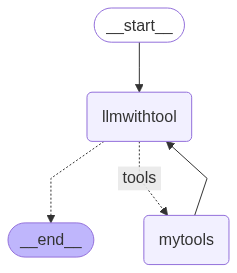

In [30]:
app4 = workflow3.compile(checkpointer=memory)
app4

In [31]:
config = {"configurable":{"thread_id":1}}
events=app4.stream(
    {"messages":["What is a weather in delhi?"]},config=config,stream_mode="values"
)

In [32]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is a weather in delhi?
================================== Ai Message ==================================
Tool Calls:
  search (58kt9dzfs)
 Call ID: 58kt9dzfs
  Args:
    query: weather in Delhi
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

Hello! The current weather in Delhi is 45 degrees and sunny. It's quite hot, so make sure to wear light clothing and stay hydrated!


In [33]:
events=app4.stream(
    {"messages":["What is a weather in indore?"]},config=config,stream_mode="values"
)

In [34]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (58kt9dzfs)
 Call ID: 58kt9dzfs
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

Hello! The current weather in Indore is 25 degrees and cloudy. It's a pleasant day, perfect for outdoor activities!


In [35]:
config

{'configurable': {'thread_id': 1}}

In [36]:
memory.get(config)

In [37]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================

The temperature of 25 degrees was in **Indore**. It was a pleasant, cloudy day there!
